# The Heckscher-Ohlin model

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

In [2]:
from modelproject import HOmodelClass

# We import our class
economy = HOmodelClass()

In [15]:
#Create an instance of the model
model = HOmodelClass()

# Solve the model without trade
model.optimize_without_trade()


# Solve the model with trade
model.optimize_with_trade()



Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\klara\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\klara\AppData\Local\Temp\ipykernel_24992\964041192.py", line 5, in <module>
    model.optimize_without_trade()
  File "c:\Users\klara\OneDrive\Dokumenter\Polit\2. Kandidat\IntroductionProgramming\Projects\projects-2024-anna-signe-og-klara\Test\NY test\modelproject.py", line 73, in optimize_without_trade
    result = minimize(obj_func, x0, bounds=bounds)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\klara\anaconda3\Lib\site-packages\scipy\optimize\_minimize.py", line 710, in minimize
    res = _minimize_lbfgsb(fun, x0, args, jac, bounds,
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\klara\anaconda3\Lib\site-packages\scipy\optimize\_lbfgsb_py.py", line 307, in _minimize_lbfgsb
    sf = _prepare_scalar_function(fun, x0, jac=jac, a

The Heckscher-Ohlin model is a classic trading model investigating the basis for comparative advantages and possible advantages of trading. 

BLA BLA BLA

**Model assumptions**

- There are 2 countries: Denmark and China. 
- They are producing 2 goods: Wind power and textile. 
- To make these goods, they use 2 production factors: Capital and labor. The factors are assumed to move freely across the industries.
- Wind power production is assumed to be capital intensive (i.e. to produce one amount of wind power, the countries need more capital than labor).
- Textile production is assumed to be labor intensive (i.e. to produce one amount of textile, the countries need more labor than capital).
- Prices on the two goods are the same across the two countries.
- The countries have the same preferences, and therefore the same utility functions.
- We assume perfect competition and no transportation costs.
- We assume there are no trade restrictions. 

**The model equations**

To calibrate this economy, we need to establish production in the two sectors. We use classical Cobb-Douglas functions for this purpose:
\begin{align*}
Y_x=A_xL_x^{1-\alpha}K_x^\alpha \quad where \quad \alpha>0 \\
Y_w=A_wL_w^{1-\beta}K_w^\beta \quad where \quad \beta>\alpha
\end{align*}
where $Y_x$ is the production of textile, and $Y_w$ is the production function for wind power. $L_x$ and $L_w$ denotes labor input in the production of the two goods, and $K_x$ and $K_w$ denotes capital input. Notice that $\beta > \alpha$, which shows that the production of wind power is more capital intensive than the production of textile. 

Furthermore we add the following ressource constraints:
\begin{align*}
K_x+K_w = \overline{K} \quad and \quad L_x+L_w=\overline{L}
\end{align*}

**The optimal use of capital and labor**

Solving the model implies defining the optimal use of labor and capital in each industry. We first calculate the marginal product of labor and capital in the textile production as
\begin{align*}
MPL_x=(1-\alpha)A_x \biggl( \frac{K_x}{L_x}\biggr)^{\alpha}  \\
MPK_x=\alpha A_x\biggl(\frac{L_x}{K_x}\biggr)^{1-\alpha}
\end{align*}
And next the MPL and MPK for the wind power production
\begin{align*}
MPL_w=(1-\beta)A_w\biggl(\frac{K_w}{L_w}\biggr)^{\beta}
\\
MPK_w=\beta A_w \biggl(\frac{L_w}{K_w}\biggr)^{1-\beta}
\end{align*}

**The utility functions**

JEG ER LIDT USIKKER PÅ, HVORDAN UTILITY FUNCTIONS SKAL SE UD I DEN HER MODEL - OM MAN BARE VÆLGER EN COBB-DOUGLAS
We use Cobb-Douglas utility functions to define the consumers' preferences:
\begin{align*}
U_A = Y_x^\phi  Y_w^{1-\phi} \\
U_B = Y_x^\psi  Y_w^{1-\psi}
\end{align*}

**The market equilibrium**

The market equilibria equations are derived by setting the two wage equations equal to eachother and solving for the relative price for the two goods. 

The labor market equilibrium 
\begin{align*}
w=P_x MPL_x \quad &and \quad w=P_w MPL_w \\
\Leftrightarrow \frac{P_w}{P_x}&=\frac{MPL_x}{MPL_w}
\end{align*}

The capital market equilibrium 
\begin{align*}
r=P_x MPK_x \quad &and \quad r=P_w MPK_w \\
\Leftrightarrow \frac{P_w}{P_x}&=\frac{MPK_x}{MPK_w}
\end{align*}

**Solving**

VI SKAL LIGE HAVE SKREVET NOGET TIL DET HER - HVORFOR DET SKAL MED
\begin{align*}
\frac{r}{w}=\frac{MPK_w}{MPL_w}=\frac{\beta}{1-\beta}\frac{L_w}{K_w}
\end{align*}

\begin{align*}
\beta > \alpha \Leftrightarrow \frac{K_w}{L_w}=\frac{\beta}{1-\beta}\biggl(\frac{r}{w}\biggr)^{-1}>\frac{K_x}{L_x}
\end{align*}


## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

In [ ]:
from modelproject import HOmodelClass

# We import our class
economy = HOmodelClass()

Capital labor abundant

In [ ]:
economy.capital_labor_ratio()

In [ ]:
# Initialize HOmodelClass
model = HOmodelClass()

# Solve the model without trade
results_without_trade = model.optimize_production_without_trade()

# Solve the model with trade
results_with_trade = model.optimize_production_with_trade()

In [ ]:
# Initialize HOmodelClass
model = HOmodelClass()

#Solve the model without trade using analytical solution
results_without_trade = model.optimize_production_without_trade_analytical()

# Solve the model with trade using analytical solution
results_with_trade = model.optimize_production_with_trade_analytical()


## Numerical solution

In [24]:
# This code is to be placed in a Jupyter Notebook cell

from modelproject import HOmodelClass  # Replace 'your_python_file' with the actual name of your .py file

# We create an instance of our class
economy = HOmodelClass()

# Run optimization
try:
    optimized_values, total_utility = economy.run_optimization()
    print("Optimized allocation of resources:", optimized_values)
    print("Total Utility Achieved:", total_utility)
except Exception as e:
    print(e)


Optimized allocation of resources: [96.25101977 41.24984308  3.74898023  8.75015692  8.74999437  3.74875861
 41.25000563 96.25124139]
Total Utility Achieved: 36.09592061894031


In [27]:
from modelproject import HOmodelClass  # Ensure your_python_file.py is the file where HOmodelClass is defined

# Create an instance of our class
economy = HOmodelClass()

# Display before trade results
before_trade_results = economy.before_trade()
print("Before Trade:")
for country, metrics in before_trade_results.items():
    print(f"{country} - Production: {metrics['Production']:.2f}, Utility: {metrics['Utility']:.2f}, Capital: {metrics['Capital']}, Labor: {metrics['Labor']}")

# Run optimization for after trade results
try:
    optimized_values, total_utility = economy.run_optimization()
    print("\nAfter Trade:")
    print("Optimized allocation of resources:", optimized_values)
    print("Total Utility Achieved:", total_utility)
except Exception as e:
    print(e)

Before Trade:
DK - Production: 81.23, Utility: 9.01, Capital: 100, Labor: 50
CN - Production: 81.23, Utility: 9.01, Capital: 50, Labor: 100

After Trade:
Optimized allocation of resources: [1.00000000e+02 5.00000000e+01 3.78364007e-13 2.50585490e-13
 5.00000000e+01 1.00000000e+02 2.52316694e-13 3.86357613e-13]
Total Utility Achieved: 36.050018504433126


In [31]:
from modelproject import HOmodelClass

economy = HOmodelClass()
# Before trade
before_trade_results = economy.before_trade()
print("Before Trade:")
for country, metrics in before_trade_results.items():
    print(f"{country} - Windmills: {metrics['Production_W']:.2f}, Textiles: {metrics['Production_T']:.2f}, Utility: {metrics['Utility']:.2f}, Capital: {metrics['Capital']}, Labor: {metrics['Labor']}")

# After trade
try:
    optimized_values, U_DK, U_CN = economy.run_optimization()
    print("\nAfter Trade:")
    print("Optimized allocation of resources:", optimized_values)
    print(f"Denmark's Utility: {U_DK:.2f}, China's Utility: {U_CN:.2f}")
except Exception as e:
    print(e)

Before Trade:
DK - Windmills: 81.23, Textiles: 0.00, Utility: 9.01, Capital: 100, Labor: 50
CN - Windmills: 0.00, Textiles: 81.23, Utility: 9.01, Capital: 50, Labor: 100

After Trade:
Optimized allocation of resources: [96.25073715 41.24930616  3.74926285  8.75069384  8.75052203  3.74903158
 41.24947797 96.25096842]
Denmark's Utility: 18.05, China's Utility: 18.05


In [34]:
from modelproject import HOmodelClass  # Import your class

economy = HOmodelClass()

# Before trade
before_trade_results = economy.before_trade()
print("Before Trade:")
for country, metrics in before_trade_results.items():
    print(f"{country} - Windmills: {metrics['Production_W']:.2f}, Textiles: {metrics['Production_T']:.2f}, Utility: {metrics['Utility']:.2f}, Capital: {metrics['Capital']}, Labor: {metrics['Labor']}")

# After trade
try:
    allocations, U_DK, U_CN = economy.run_optimization()
    print("\nAfter Trade:")
    for country, resources in allocations.items():
        print(f"{country} - K_Windmills: {resources['K_Windmills']:.2f}, L_Windmills: {resources['L_Windmills']:.2f}, K_Textiles: {resources['K_Textiles']:.2f}, L_Textiles: {resources['L_Lextiles']:.2f}")
    print(f"Denmark's Utility: {U_DK:.2f}, China's Utility: {U_CN:.2f}")
except Exception as e:
    print(e)

Before Trade:
DK - Windmills: 81.23, Textiles: 0.00, Utility: 9.01, Capital: 100, Labor: 50
CN - Windmills: 0.00, Textiles: 81.23, Utility: 9.01, Capital: 50, Labor: 100

After Trade:
'L_Lextiles'


In [36]:
from modelproject import HOmodelClass  # Import your class

economy = HOmodelClass()

# Before trade
before_trade_results = economy.before_trade()
print("Before Trade:")
for country, metrics in before_trade_results.items():
    print(f"{country} - Windmills: {metrics['Production_W']:.2f}, Textiles: {metrics['Production_T']:.2f}, Utility: {metrics['Utility']:.2f}, Capital: {metrics['Capital']}, Labor: {metrics['Labor']}")

# After trade
try:
    allocations, U_DK, U_CN = economy.run_optimization()
    print("\nAfter Trade:")
    for country, resources in allocations.items():
        print(f"{country} - K_Windmills: {resources['K_Windmills']:.2f}, L_Windmills: {resources['L_Windmills']:.2f}, K_Textiles: {resources['K_Textiles']:.2f}, L_Textiles: {resources['L_Textiles']:.2f}")
    print(f"Denmark's Utility: {U_DK:.2f}, China's Utility: {U_CN:.2f}")
except Exception as e:
    print(e)


Before Trade:
DK - Windmills: 81.23, Textiles: 0.00, Utility: 9.01, Capital: 100, Labor: 50
CN - Windmills: 0.00, Textiles: 81.23, Utility: 9.01, Capital: 50, Labor: 100

After Trade:
DK - K_Windmills: 96.25, L_Windmills: 41.25, K_Textiles: 3.75, L_Textiles: 8.75
CN - K_Windmills: 8.75, L_Windmills: 3.75, K_Textiles: 41.25, L_Textiles: 96.25
Denmark's Utility: 18.05, China's Utility: 18.05


In [48]:
from modelproject import HOmodelClass  # Import your class

economy = HOmodelClass()

# Before trade
before_trade_results = economy.before_trade()
print("Before Trade:")
for country, metrics in before_trade_results.items():
    print(f"{country} - Windmills: {metrics['Production_W']:.2f}, Textiles: {metrics['Production_T']:.2f}, Utility: {metrics['Utility']:.2f}, Capital: {metrics['Capital']}, Labor: {metrics['Labor']}")

# After trade
try:
    allocations, U_DK, U_CN = economy.run_optimization()
    print("\nAfter Trade:")
    for country, resources in allocations.items():
        print(f"{country} - K_Windmills: {resources['K_Windmills']:.2f}, L_Windmills: {resources['L_Windmills']:.2f}, K_Textiles: {resources['K_Textiles']:.2f}, L_Textiles: {resources['L_Textiles']:.2f}, Total Production Windmills: {resources['Production_Windmills']:.2f}, Total Production Textiles: {resources['Production_Textiles']:.2f}")
    print(f"Denmark's Utility: {U_DK:.2f}, China's Utility: {U_CN:.2f}")
except Exception as e:
    print(e)




Before Trade:
DK - Windmills: 81.23, Textiles: 0.00, Utility: 9.01, Capital: 100, Labor: 50
CN - Windmills: 0.00, Textiles: 81.23, Utility: 9.01, Capital: 50, Labor: 100

After Trade:
DK - K_Windmills: 96.25, L_Windmills: 41.25, K_Textiles: 3.75, L_Textiles: 8.75, Total Production Windmills: 74.65, Total Production Textiles: 6.79
CN - K_Windmills: 8.75, L_Windmills: 3.75, K_Textiles: 41.25, L_Textiles: 96.25, Total Production Windmills: 6.79, Total Production Textiles: 74.65
Denmark's Utility: 18.05, China's Utility: 18.05


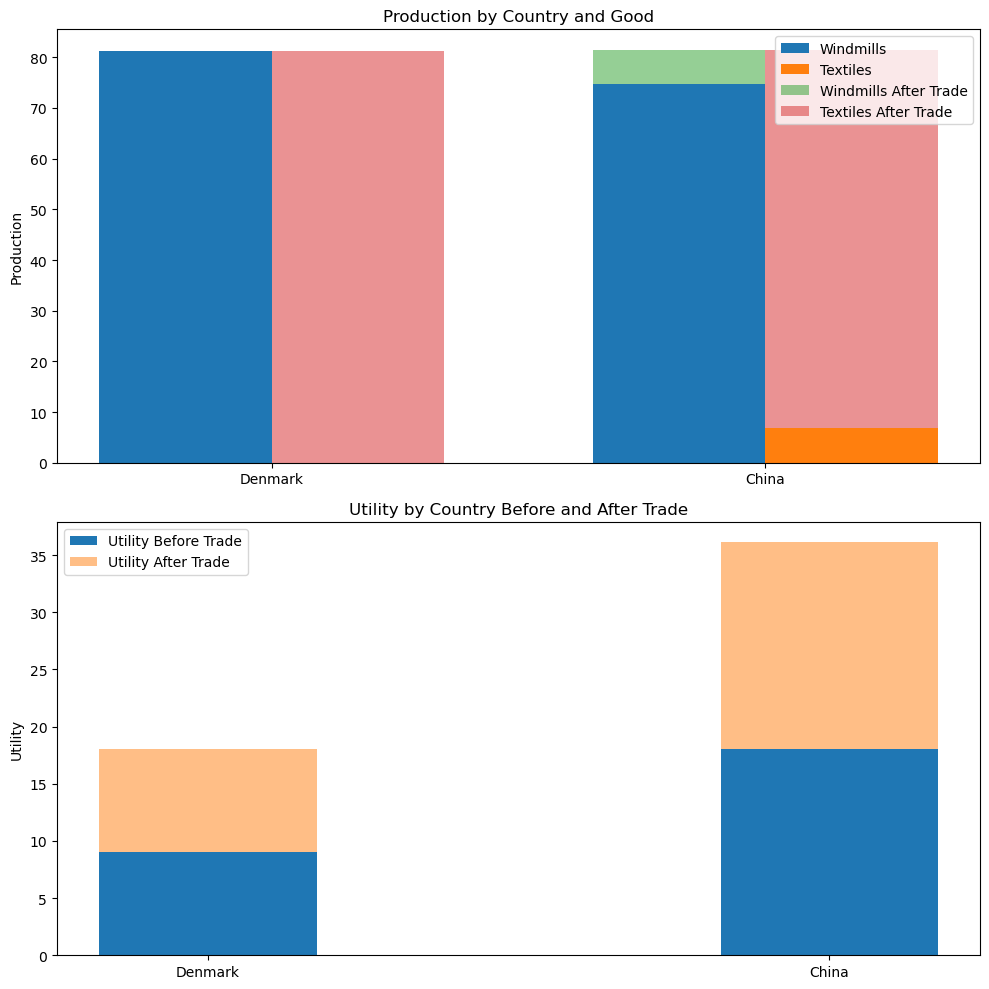

In [51]:
from modelproject import HOmodelClass  # make sure 'your_python_file' matches the actual file name
import matplotlib.pyplot as plt
import seaborn as sns

# Create an instance of the model
economy = HOmodelClass()

# Get the results before trade
before_trade_results = economy.before_trade()

# Get the results after trade
try:
    allocations, U_DK, U_CN = economy.run_optimization()
except Exception as e:
    print(e)
    allocations = None




if allocations:
    # Data Preparation
    labels = ['Denmark', 'China']
    production_windmills = [before_trade_results['DK']['Production_W'], 0,
                            allocations['DK']['Production_Windmills'], allocations['CN']['Production_Windmills']]
    production_textiles = [0, before_trade_results['CN']['Production_T'],
                           allocations['DK']['Production_Textiles'], allocations['CN']['Production_Textiles']]
    utility = [before_trade_results['DK']['Utility'], before_trade_results['CN']['Utility'], U_DK, U_CN]
    
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of the bars

    fig, ax = plt.subplots(2, 1, figsize=(10, 10))

    # Production Plot
    rects1 = ax[0].bar(x - width/2, production_windmills[::2], width, label='Windmills')
    rects2 = ax[0].bar(x + width/2, production_textiles[::2], width, label='Textiles')
    rects3 = ax[0].bar(x - width/2, production_windmills[1::2], width, bottom=production_windmills[::2], label='Windmills After Trade', alpha=0.5)
    rects4 = ax[0].bar(x + width/2, production_textiles[1::2], width, bottom=production_textiles[::2], label='Textiles After Trade', alpha=0.5)

    ax[0].set_ylabel('Production')
    ax[0].set_title('Production by Country and Good')
    ax[0].set_xticks(x)
    ax[0].set_xticklabels(labels)
    ax[0].legend()

    # Utility Plot
    rects5 = ax[1].bar(x, utility[::2], width, label='Utility Before Trade')
    rects6 = ax[1].bar(x, utility[1::2], width, bottom=utility[::2], label='Utility After Trade', alpha=0.5)

    ax[1].set_ylabel('Utility')
    ax[1].set_title('Utility by Country Before and After Trade')
    ax[1].set_xticks(x)
    ax[1].set_xticklabels(labels)
    ax[1].legend()

    plt.tight_layout()
    plt.show()

In [40]:
model.plot_ppf()

AttributeError: 'HOmodelClass' object has no attribute 'plot_ppf'

In [ ]:
# Assuming 'model' is your instance of the ModelProject class
model.plot_utility_surface(country='DK', trade=True)

model.plot_utility_surface(country='DK', trade=False)

model.plot_utility_surface(country='CN', trade=True)

model.plot_utility_surface(country='CN', trade=False)

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 